In [1]:
import pandas as pd
from tqdm import tqdm
from sklearn.cluster import SpectralClustering
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing 
from collections import defaultdict
from sklearn.manifold import TSNE
import warnings
warnings.filterwarnings("ignore")
from sklearn.datasets import make_biclusters
import matplotlib.pyplot as plt
import seaborn as sns
from copy import deepcopy
sns.set(color_codes=True)
from sklearn.cluster import KMeans

In [2]:
user_df = pd.read_csv('./data/user_handcrafted_features.csv')

In [3]:
user_df.head(10)

,new_use_id,old_use_id,taobao_record_count,taobao_buy_count,taobao_click_count,taobao_buy_ratio,taobao_items_buy_count,taobao_items_click_count,taobao_items_buy_ratio,taobao_cats_buy_count,taobao_cats_click_count,taobao_cats_buy_ratio,koubei_record_count,koubei_locations_count,koubei_merchant_count
0,0,1980536,1948,4,1944,0.002053,4,323,0.012232,2,25,0.074074,0,0,0
1,1,647747,337,8,329,0.023739,8,266,0.029197,5,27,0.156250,0,0,0
2,2,183647,431,79,352,0.183295,56,220,0.202899,18,27,0.400000,0,0,0
3,3,723956,384,59,325,0.153646,42,203,0.171429,17,23,0.425000,0,0,0
4,4,1781938,151,8,143,0.052980,8,99,0.074766,6,20,0.230769,0,0,0
5,5,1652831,370,15,355,0.040541,12,164,0.068182,7,16,0.304348,2,1,1
6,6,416403,1055,30,1025,0.028436,16,651,0.023988,9,30,0.230769,0,0,0
7,7,43130,249,31,218,0.124498,29,158,0.155080,9,24,0.272727,23,2,1
8,8,502518,316,26,290,0.082278,20,186,0.097087,7,22,0.241379,0,0,0
9,9,109400,221,9,212,0.040724,6,124,0.046154,5,11,0.312500,0,0,0


In [4]:
user_ndarr = user_df.values[:,2:]

In [5]:
user_ndarr[0,:]

array([1.94800000e+03, 4.00000000e+00, 1.94400000e+03, 2.05338809e-03,
       4.00000000e+00, 3.23000000e+02, 1.22324159e-02, 2.00000000e+00,
       2.50000000e+01, 7.40740741e-02, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00])

In [6]:
min_max_scaler = preprocessing.MinMaxScaler()  
user_ndarr_normalized = min_max_scaler.fit_transform(user_ndarr)
print(user_ndarr_normalized.shape)

(963923, 13)


In [7]:
user_ndarr_normalized[0, :]

array([0.02337251, 0.00097728, 0.0233393 , 0.00205339, 0.00480769,
       0.01584576, 0.01223242, 0.05      , 0.34722222, 0.07407407,
       0.        , 0.        , 0.        ])

In [10]:
def select_k(X):
    distance = []
    k = []
    #簇的数量
    for n_clusters in tqdm([12]):
        clustering = KMeans(n_clusters=n_clusters, init='k-means++', n_init=10, max_iter=300, tol=0.0001, verbose=2, n_jobs=4)
        clustering.fit(X)
        #曼哈顿距离
        def manhattan_distance(x,y):
            return np.sum(abs(x-y))
        
        distance_sum = 0
        for i in range(n_clusters):
            group = clustering.labels_ == i
            members = X[group,:]
            for v in members:
                distance_sum += manhattan_distance(np.array(v), clustering.cluster_centers_[i])
        distance.append(distance_sum)
        k.append(n_clusters)
    plt.scatter(k, distance)
    plt.plot(k, distance)
    plt.xlabel("k")
    plt.ylabel("distance")
    plt.show()

  0%|          | 0/1 [00:00<?, ?it/s]

Initialization complete
Initialization complete
Initialization complete
start iteration
done sorting
start iteration
done sorting
end inner loop
Initialization complete
end inner loop
start iteration
done sorting
start iteration
done sorting
end inner loop
end inner loop
Iteration 0, inertia 17243.093222474836
start iteration
done sorting
Iteration 0, inertia 17431.960772968505
start iteration
done sorting
end inner loop
end inner loop
Iteration 0, inertia 17815.132164835235
start iteration
done sorting
Iteration 0, inertia 17400.155191624945
start iteration
done sorting
end inner loop
end inner loop
Iteration 1, inertia 16281.419044943457
start iteration
done sorting
Iteration 1, inertia 16469.059941740008
start iteration
done sorting
end inner loop
end inner loop
Iteration 1, inertia 16600.34723361311
start iteration
done sorting
Iteration 1, inertia 16472.176072486713
start iteration
done sorting
end inner loop
end inner loop
Iteration 2, inertia 16100.787658911855
start iteration
d

Iteration 24, inertia 15751.203613553886
start iteration
done sorting
Iteration 23, inertia 15856.822771440806
start iteration
done sorting
end inner loop
Iteration 24, inertia 16057.37068667684
start iteration
done sorting
end inner loop
end inner loop
Iteration 23, inertia 15651.092288159934
start iteration
done sorting
end inner loop
Iteration 25, inertia 15751.136624134706
Iteration 24, inertia 15855.879511467982
start iteration
center shift 1.859156e-03 within tolerance 3.691488e-06
done sorting
Iteration 25, inertia 16056.12163509516
start iteration
done sorting
end inner loop
end inner loop
Iteration 24, inertia 15647.60275658472
start iteration
done sorting
end inner loop
Iteration 25, inertia 15855.29418323313
start iteration
done sorting
Iteration 26, inertia 16054.972395336972
start iteration
done sorting
end inner loop
end inner loop
Iteration 25, inertia 15644.868465656475
start iteration
done sorting
end inner loop
Iteration 26, inertia 15854.985168844927
start iteration


start iteration
done sorting
end inner loop
end inner loop
end inner loop
Iteration 52, inertia 16007.939391006284
start iteration
done sorting
end inner loop
Iteration 5, inertia 16522.460885564826
Iteration 20, inertia 15881.189922024345
start iteration
done sorting
start iteration
Iteration 14, inertia 16109.111272877039
done sorting
start iteration
done sorting
end inner loop
end inner loop
end inner loop
Iteration 53, inertia 16007.589515724387
start iteration
done sorting
end inner loop
Iteration 21, inertia 15876.163412022392
Iteration 15, inertia 16103.738454059825
start iteration
start iteration
done sorting
done sorting
Iteration 6, inertia 16481.36036102968
start iteration
done sorting
end inner loop
end inner loop
end inner loop
Iteration 54, inertia 16007.25376199702
start iteration
done sorting
end inner loop
Iteration 16, inertia 16100.542694164536
Iteration 22, inertia 15870.649575604764
start iteration
start iteration
done sorting
done sorting
Iteration 7, inertia 1645

start iteration
end inner loop
done sorting
end inner loop
Iteration 9, inertia 15855.856243359218
start iteration
done sorting
Iteration 46, inertia 15746.136442811448
start iteration
done sorting
end inner loop
end inner loop
Iteration 7, inertia 16143.604068986724
start iteration
done sorting
Iteration 32, inertia 16324.605312861819
start iteration
done sorting
end inner loop
end inner loop
Iteration 10, inertia 15839.37363903213
Iteration 47, inertia 15745.865718490286
start iteration
start iteration
done sorting
done sorting
end inner loop
end inner loop
Iteration 8, inertia 16103.42320009232
start iteration
done sorting
Iteration 33, inertia 16322.343913229164
start iteration
done sorting
end inner loop
end inner loop
Iteration 48, inertia 15745.647230816181
Iteration 11, inertia 15826.971425391552
start iteration
done sorting
start iteration
done sorting
end inner loop
end inner loop
Iteration 9, inertia 16074.009366582808
start iteration
done sorting
Iteration 34, inertia 16320

done sorting
done sorting
end inner loop
end inner loop
Iteration 10, inertia 16512.534701051434
start iteration
done sorting
Iteration 57, inertia 16239.22160042909
start iteration
done sorting
end inner loop
end inner loop
Iteration 35, inertia 15668.855292331147
start iteration
Iteration 32, inertia 15945.121123157209
done sorting
start iteration
done sorting
end inner loop
end inner loop
Iteration 11, inertia 16502.984796573102
start iteration
done sorting
Iteration 58, inertia 16231.993930531615
start iteration
done sorting
end inner loop
end inner loop
Iteration 36, inertia 15665.438239303694
Iteration 33, inertia 15939.899485040232
start iteration
start iteration
done sorting
done sorting
end inner loop
end inner loop
Iteration 12, inertia 16496.964857741295
start iteration
done sorting
Iteration 59, inertia 16225.798833390345
start iteration
done sorting
end inner loop
end inner loop
Iteration 34, inertia 15932.297816159511
start iteration
Iteration 37, inertia 15662.5546430062

Iteration 81, inertia 16148.845073474644
start iteration
done sorting
Iteration 34, inertia 16438.574945452725
Iteration 59, inertia 15630.731998613566
start iteration
start iteration
done sorting
end inner loop
done sorting
end inner loop
end inner loop
Iteration 82, inertia 16148.619992632062
start iteration
done sorting
Iteration 35, inertia 16437.623241598503
start iteration
done sorting
Iteration 60, inertia 15630.501712329493
end inner loop
start iteration
done sorting
end inner loop
end inner loop
Iteration 83, inertia 16148.38001114213
start iteration
done sorting
Iteration 36, inertia 16437.110265009604
start iteration
done sorting
end inner loop
Iteration 61, inertia 15630.30174849773
start iteration
done sorting
end inner loop
end inner loop
Iteration 84, inertia 16148.164930887886
start iteration
done sorting
Iteration 37, inertia 16436.40203184856
start iteration
done sorting
Iteration 62, inertia 15630.13320772647
start iteration
done sorting
end inner loop
end inner loop

100%|██████████| 1/1 [01:45<00:00, 105.24s/it]


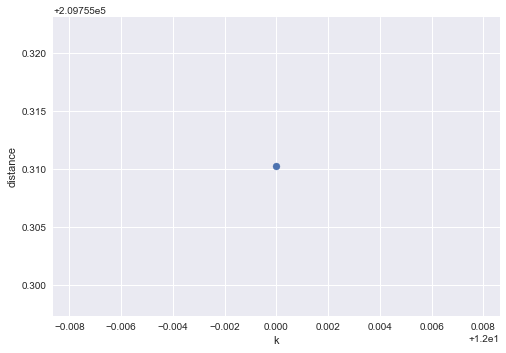

In [11]:
select_k(user_ndarr_normalized)

In [ ]:
clustering.labels